# **Testing**

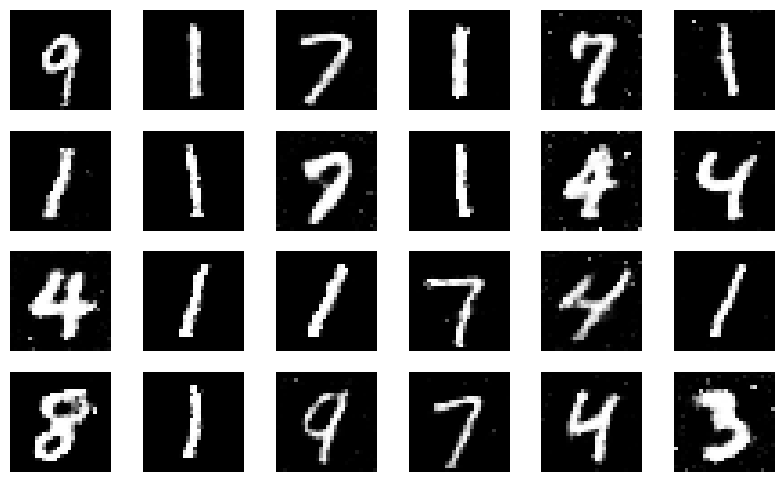

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.fc_1 = nn.Linear(input_dim, 256)
        self.fc_2 = nn.Linear(256, 512)
        self.fc_3 = nn.Linear(512, 1024)
        self.fc_4 = nn.Linear(1024, output_dim * output_dim)
        
    def forward(self, x):
        x = F.leaky_relu(self.fc_1(x), 0.2)
        x = F.leaky_relu(self.fc_2(x), 0.2)
        x = F.leaky_relu(self.fc_3(x), 0.2)
        return torch.tanh(self.fc_4(x)).view(-1, 1, 28, 28)

model = Generator(input_dim=100, output_dim=28)

checkpoint = torch.load('models/mnist_generator.pth')
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

input_tensor = torch.randn(24, 100).to(device)
output = model(input_tensor)

output = (output + 1) / 2

output_images = output.detach().cpu().numpy().reshape(-1, 28, 28)

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(10, 6))
axes = axes.ravel()

for i, img in enumerate(output_images):
    axes[i].imshow(img, cmap="gray")
    axes[i].axis("off")
